<a href="https://colab.research.google.com/github/rafaelOsoriog/pruebas_saber_pro_colombia/blob/main/02_preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carga de dataset desde kaggle

In [46]:
!pip install kaggle

In [47]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"rafaelosoriogmez","key":"01111c2adde36ae29f3ef5693574fda5"}'}

In [48]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [49]:
! cp kaggle.json ~/.kaggle/

In [50]:
! chmod 600 ~/.kaggle/kaggle.json

In [53]:
! kaggle competitions download -c udea-ai4eng-20241

udea-ai4eng-20241.zip: Skipping, found more recently modified local copy (use --force to force download)


In [55]:
! unzip udea-ai4eng-20241.zip

Archive:  udea-ai4eng-20241.zip
replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: submission_example.csv  
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


## Exploración del dataset

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [58]:
train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_TIENELAVADORA              652727 non-null  object
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object
 12  ESTU_PAGOMATRICULAPROPIO      

Se observa que la base de datos de entrenamiento consta de 692500 observaciones y 17 variables que incluyen 2 variables discretas, 14 variables categoricas y la variable de resultado RENDIMIENTO_GLOBAL

In [60]:
test.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa


In [61]:
train.PERIODO.value_counts()

PERIODO
20195    180873
20203    171838
20212    171412
20183    164818
20194      1472
20213      1178
20202       490
20184       254
20196       165
Name: count, dtype: int64

In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296786 entries, 0 to 296785
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              296786 non-null  int64 
 1   PERIODO                         296786 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             296786 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          296786 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  294063 non-null  object
 5   ESTU_HORASSEMANATRABAJA         283407 non-null  object
 6   FAMI_ESTRATOVIVIENDA            282991 non-null  object
 7   FAMI_TIENEINTERNET              285247 non-null  object
 8   FAMI_EDUCACIONPADRE             286793 non-null  object
 9   FAMI_TIENELAVADORA              279527 non-null  object
 10  FAMI_TIENEAUTOMOVIL             277868 non-null  object
 11  ESTU_PRIVADO_LIBERTAD           296786 non-null  object
 12  ESTU_PAGOMATRICULAPROPIO      

###Exploración individua de datos

In [63]:
train.PERIODO.value_counts()

PERIODO
20195    180873
20203    171838
20212    171412
20183    164818
20194      1472
20213      1178
20202       490
20184       254
20196       165
Name: count, dtype: int64

In [64]:
train.ESTU_PRGM_ACADEMICO.value_counts()

ESTU_PRGM_ACADEMICO
DERECHO                                                   53244
ADMINISTRACION DE EMPRESAS                                51902
CONTADURIA PUBLICA                                        39664
PSICOLOGIA                                                31932
INGENIERIA INDUSTRIAL                                     28481
                                                          ...  
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                           1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES                    1
ADMINISTRACION DE COMERCIO EXTERIOR                           1
LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y DEPORTES        1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                         1
Name: count, Length: 948, dtype: int64

In [17]:
train.FAMI_ESTRATOVIVIENDA.value_counts()

FAMI_ESTRATOVIVIENDA
Estrato 2      232671
Estrato 3      210685
Estrato 1      111991
Estrato 4       65514
Estrato 5       23608
Estrato 6       12605
Sin Estrato      3289
Name: count, dtype: int64

In [18]:
train.FAMI_EDUCACIONPADRE.value_counts()

FAMI_EDUCACIONPADRE
Secundaria (Bachillerato) completa      128289
Primaria incompleta                     125675
Educación profesional completa           83117
Secundaria (Bachillerato) incompleta     71654
Técnica o tecnológica completa           62995
Primaria completa                        55958
Postgrado                                44169
Educación profesional incompleta         27084
Técnica o tecnológica incompleta         22552
Ninguno                                  22008
No sabe                                  16592
No Aplica                                 9229
Name: count, dtype: int64

##Evalución de valores nulos

In [19]:
print(train.isnull().values.any())
print(test.isnull().values.any())

True
True


En ambos dataset se encuentran campos con valores nulos, es necesario realizar un pre-procesamiento, estandarizacion o llenado de datos nulos.

##Evalución de datos duplicados

In [20]:
print("datos duplicados en train:", train.duplicated().sum())
print("datos duplicados en train:", test.duplicated().sum())

datos duplicados en train: 0
datos duplicados en train: 0


No se encuentran datos duplicados en los dataset

##Histograma

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'PERIODO'}>]], dtype=object)

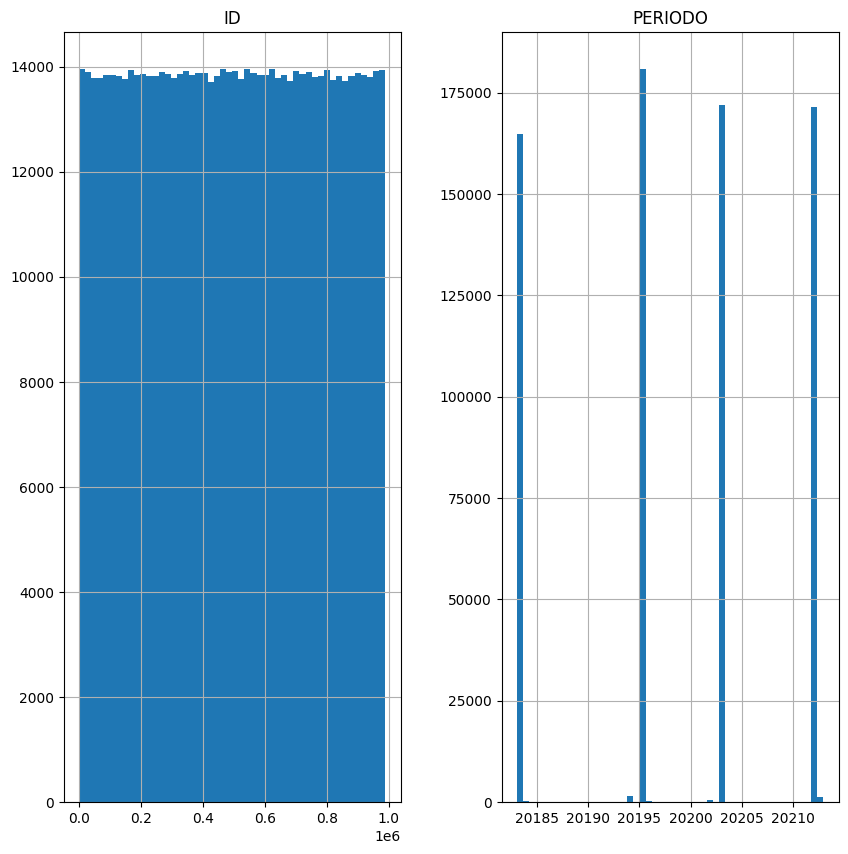

In [21]:
train.hist(bins=50, figsize=(10,10))

Se realiza el histograma y solo se puede visualizar las dos variables discretas, para las demás variables se debe realizar un pre-procesamiento de los datos categorigos para analizar su comportamiento y la respectiva analitica.

#Preprocesamiento de datos

###Eliminacion de colomnas repetidas

In [65]:
train = train.drop ('FAMI_TIENEINTERNET.1', axis = 1)
train.head()

In [66]:
test = test.drop ('FAMI_TIENEINTERNET.1', axis = 1)
test.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Primaria completa
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Técnica o tecnológica completa
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Secundaria (Bachillerato) completa
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,Primaria incompleta
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Secundaria (Bachillerato) completa


In [67]:
from sklearn.preprocessing import LabelEncoder
cols = ["FAMI_TIENEINTERNET","FAMI_TIENELAVADORA","FAMI_TIENEAUTOMOVIL","ESTU_PRIVADO_LIBERTAD","ESTU_PAGOMATRICULAPROPIO","FAMI_TIENECOMPUTADOR"]
train[cols] = train[cols].apply(LabelEncoder().fit_transform)
train.head()


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,1,Técnica o tecnológica incompleta,1,1,0,0,1,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,0,Técnica o tecnológica completa,1,0,0,0,1,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,1,Secundaria (Bachillerato) completa,1,0,0,0,0,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,1,No sabe,1,0,0,0,1,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,1,Primaria completa,1,1,0,0,1,Primaria completa,medio-bajo


In [80]:
from sklearn.preprocessing import LabelEncoder
cols = ["FAMI_TIENEINTERNET","FAMI_TIENELAVADORA","FAMI_TIENEAUTOMOVIL","ESTU_PRIVADO_LIBERTAD","ESTU_PAGOMATRICULAPROPIO","FAMI_TIENECOMPUTADOR"]
test[cols] = test[cols].apply(LabelEncoder().fit_transform)
test.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,1,Técnica o tecnológica completa,1,0,0,1,1,Primaria completa
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,1,Secundaria (Bachillerato) completa,1,0,0,0,1,Técnica o tecnológica completa
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,1,Secundaria (Bachillerato) incompleta,1,0,0,0,1,Secundaria (Bachillerato) completa
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,0,Primaria incompleta,1,0,0,0,0,Primaria incompleta
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,1,Secundaria (Bachillerato) completa,1,0,0,0,1,Secundaria (Bachillerato) completa


In [68]:
cols = ["ESTU_PRGM_ACADEMICO","ESTU_PRGM_DEPARTAMENTO","ESTU_VALORMATRICULAUNIVERSIDAD","ESTU_HORASSEMANATRABAJA","FAMI_ESTRATOVIVIENDA","FAMI_EDUCACIONPADRE","FAMI_EDUCACIONMADRE","RENDIMIENTO_GLOBAL"]
train[cols] = train[cols].apply(LabelEncoder().fit_transform)
train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,300,4,3,3,2,1,11,1,1,0,0,1,5,2
1,645256,20212,249,3,1,0,2,0,10,1,0,0,0,1,11,1
2,308367,20203,819,4,1,4,2,1,8,1,0,0,0,0,8,1
3,470353,20195,14,26,2,0,3,1,4,1,0,0,0,1,8,0
4,989032,20212,907,1,1,2,2,1,6,1,1,0,0,1,6,3


In [83]:
cols = ["ESTU_PRGM_ACADEMICO","ESTU_PRGM_DEPARTAMENTO","ESTU_VALORMATRICULAUNIVERSIDAD","ESTU_HORASSEMANATRABAJA","FAMI_ESTRATOVIVIENDA","FAMI_EDUCACIONPADRE","FAMI_EDUCACIONMADRE"]
test[cols] = test[cols].apply(LabelEncoder().fit_transform)
test.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE
0,550236,20183,914,5,5,3,2,1,10,1,0,0,1,1,6
1,98545,20203,13,1,1,2,1,1,8,1,0,0,0,1,10
2,499179,20212,449,4,0,0,2,1,9,1,0,0,0,1,8
3,782980,20195,228,27,0,2,0,0,7,1,0,0,0,0,7
4,785185,20212,14,3,1,1,1,1,8,1,0,0,0,1,8


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'PERIODO'}>,
        <Axes: title={'center': 'ESTU_PRGM_ACADEMICO'}>,
        <Axes: title={'center': 'ESTU_PRGM_DEPARTAMENTO'}>],
       [<Axes: title={'center': 'ESTU_VALORMATRICULAUNIVERSIDAD'}>,
        <Axes: title={'center': 'ESTU_HORASSEMANATRABAJA'}>,
        <Axes: title={'center': 'FAMI_ESTRATOVIVIENDA'}>,
        <Axes: title={'center': 'FAMI_TIENEINTERNET'}>],
       [<Axes: title={'center': 'FAMI_EDUCACIONPADRE'}>,
        <Axes: title={'center': 'FAMI_TIENELAVADORA'}>,
        <Axes: title={'center': 'FAMI_TIENEAUTOMOVIL'}>,
        <Axes: title={'center': 'ESTU_PRIVADO_LIBERTAD'}>],
       [<Axes: title={'center': 'ESTU_PAGOMATRICULAPROPIO'}>,
        <Axes: title={'center': 'FAMI_TIENECOMPUTADOR'}>,
        <Axes: title={'center': 'FAMI_EDUCACIONMADRE'}>,
        <Axes: title={'center': 'RENDIMIENTO_GLOBAL'}>]], dtype=object)

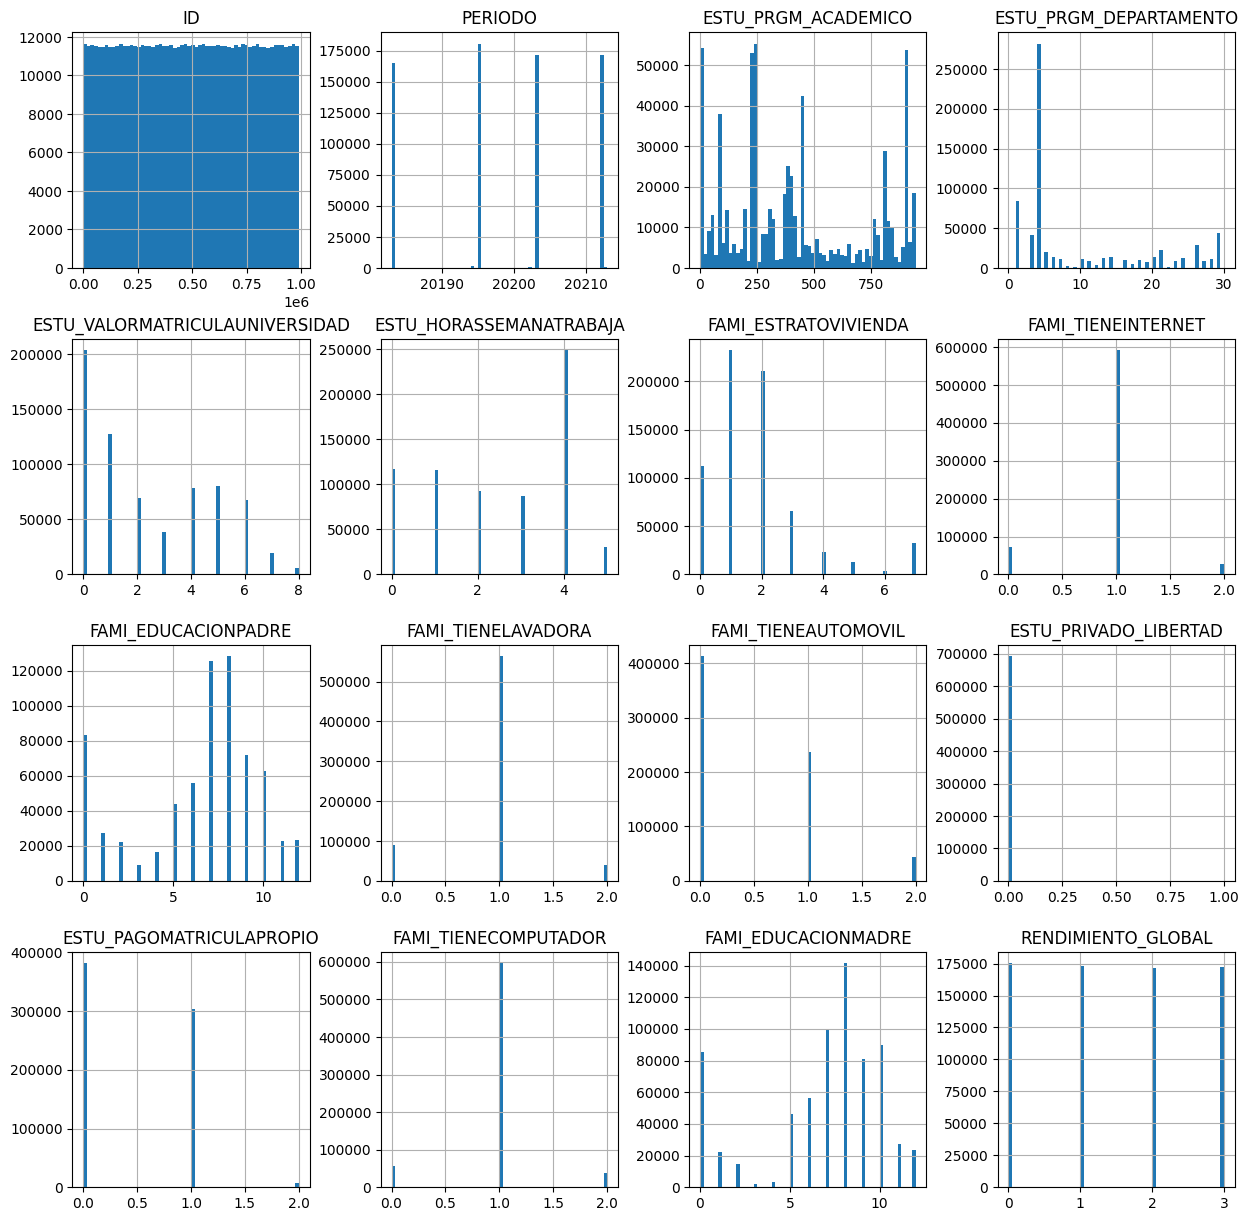

In [69]:
train.hist(bins=60, figsize=(15,15))

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'PERIODO'}>,
        <Axes: title={'center': 'ESTU_PRGM_ACADEMICO'}>,
        <Axes: title={'center': 'ESTU_PRGM_DEPARTAMENTO'}>],
       [<Axes: title={'center': 'ESTU_VALORMATRICULAUNIVERSIDAD'}>,
        <Axes: title={'center': 'ESTU_HORASSEMANATRABAJA'}>,
        <Axes: title={'center': 'FAMI_ESTRATOVIVIENDA'}>,
        <Axes: title={'center': 'FAMI_TIENEINTERNET'}>],
       [<Axes: title={'center': 'FAMI_EDUCACIONPADRE'}>,
        <Axes: title={'center': 'FAMI_TIENELAVADORA'}>,
        <Axes: title={'center': 'FAMI_TIENEAUTOMOVIL'}>,
        <Axes: title={'center': 'ESTU_PRIVADO_LIBERTAD'}>],
       [<Axes: title={'center': 'ESTU_PAGOMATRICULAPROPIO'}>,
        <Axes: title={'center': 'FAMI_TIENECOMPUTADOR'}>,
        <Axes: title={'center': 'FAMI_EDUCACIONMADRE'}>, <Axes: >]],
      dtype=object)

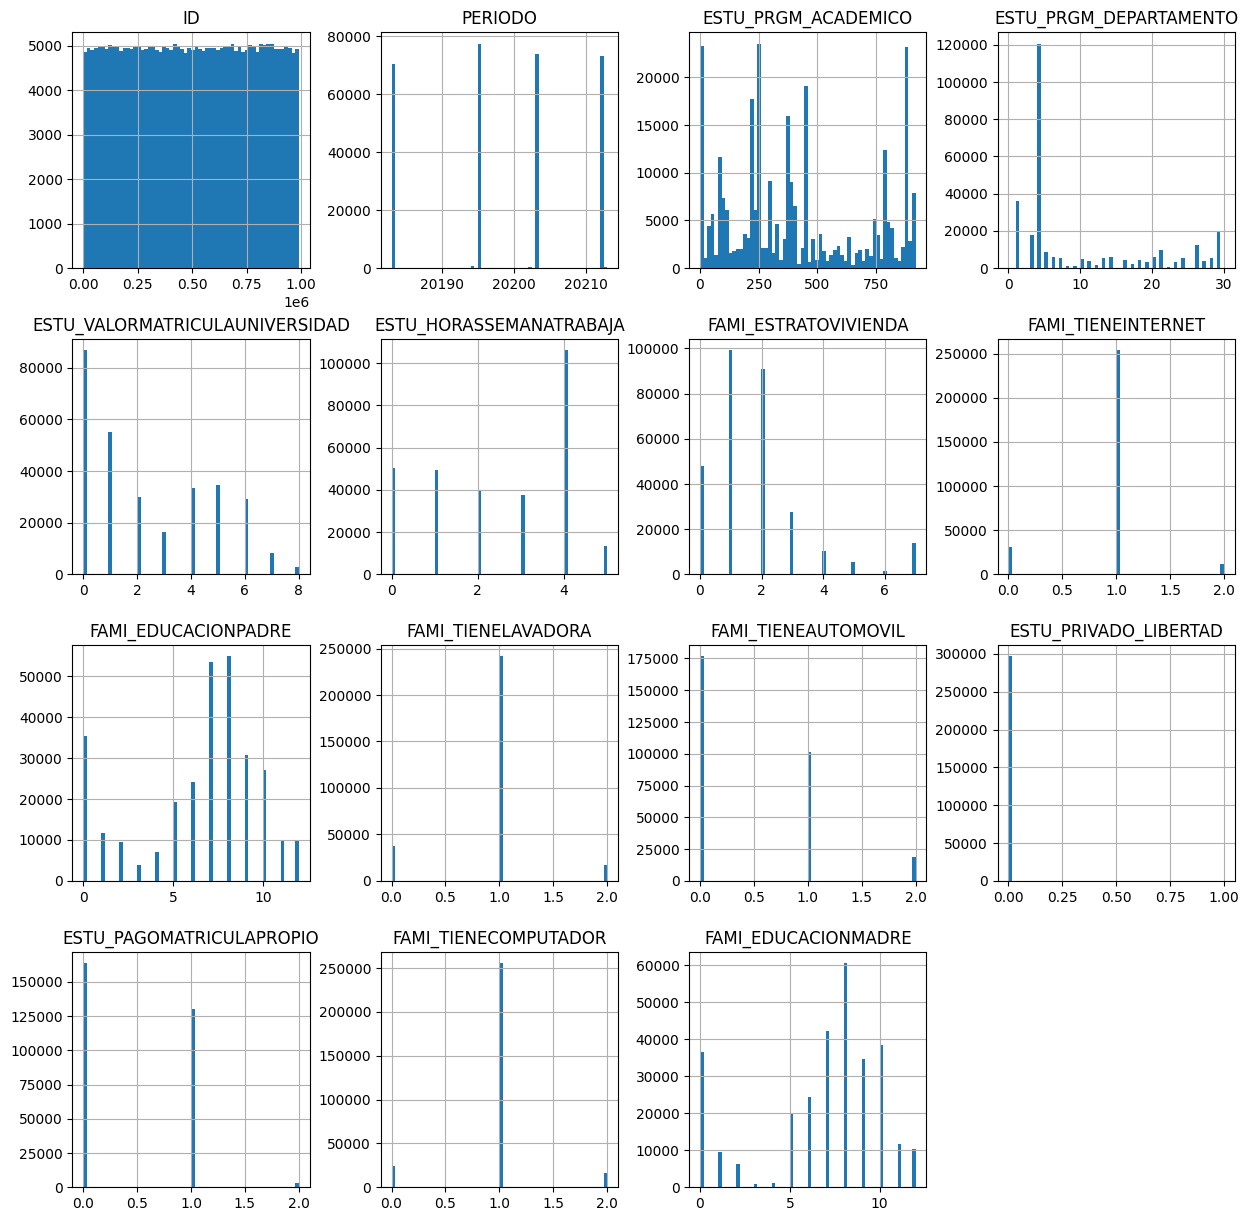

In [84]:
test.hist(bins=60, figsize=(15,15))

## Matriz de correlación

<Axes: >

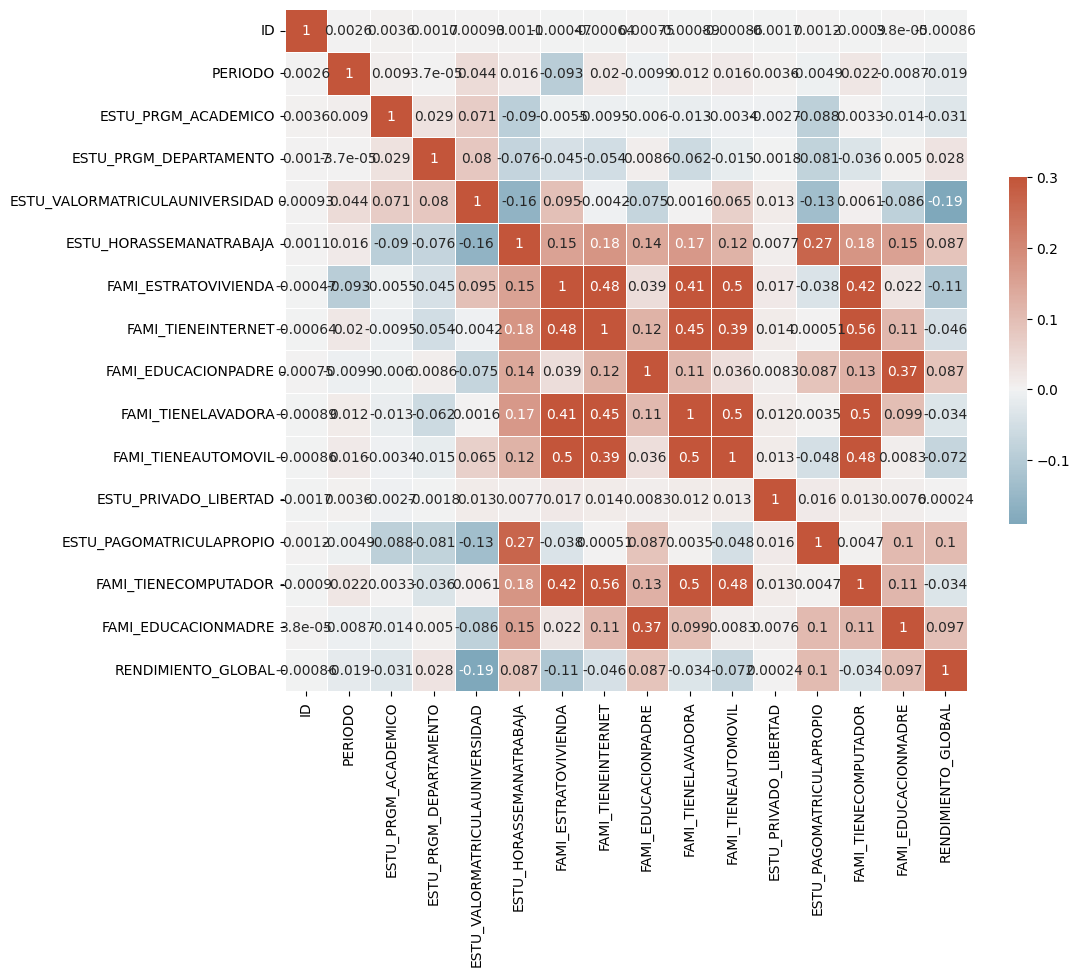

In [70]:
corr = train.corr(method='pearson')
f, ax, = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=0.3, center=0, square=True, linewidths=0.5, cbar_kws={"shrink":0.5}, annot=True)

Se puede notar las realaciones entre las diferentes variables donde hay una realacion fuerte entre, si la familia tiene internet y el estrato de la vivienda; tambien se puede notar relación entre las familias que tienen computador tambien tienen internet

<Axes: >

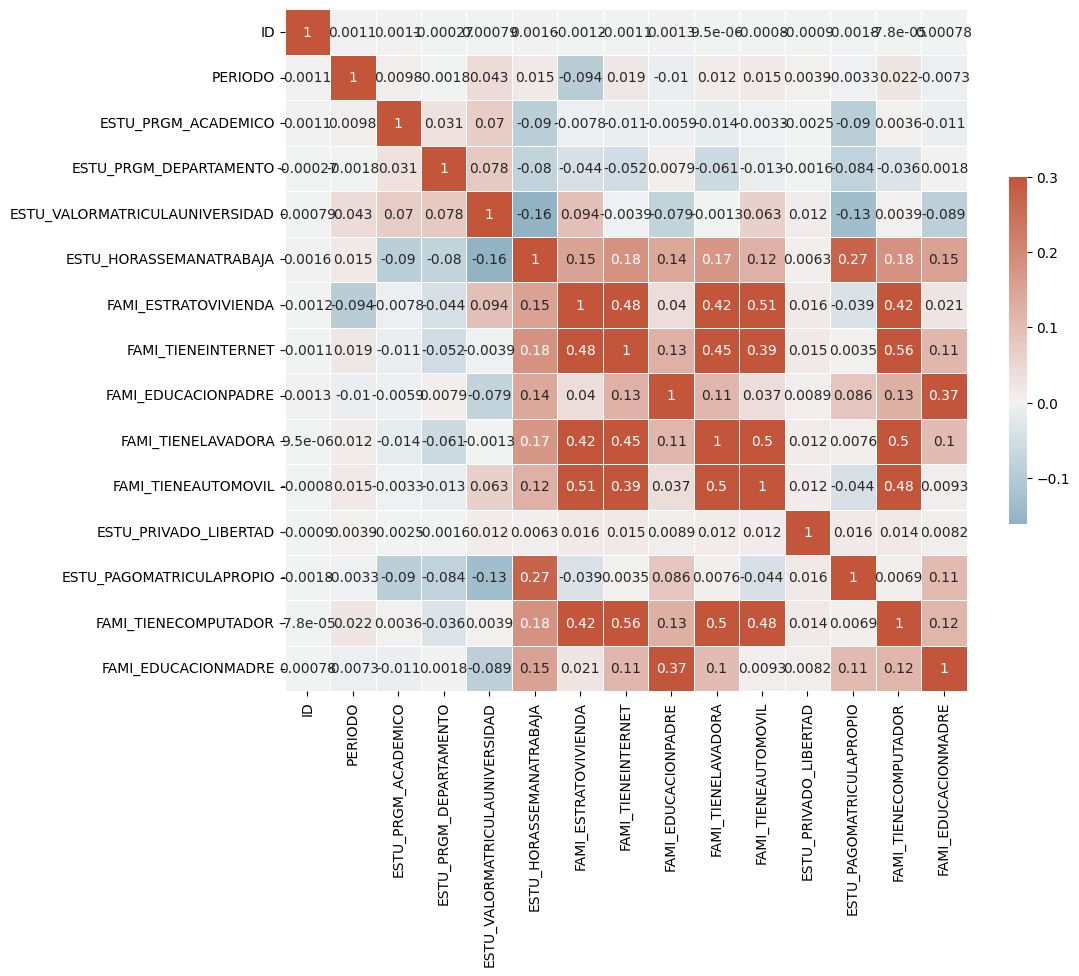

In [85]:
corr = test.corr(method='pearson')
f, ax, = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=0.3, center=0, square=True, linewidths=0.5, cbar_kws={"shrink":0.5}, annot=True)

#Análisis de variable respuesta

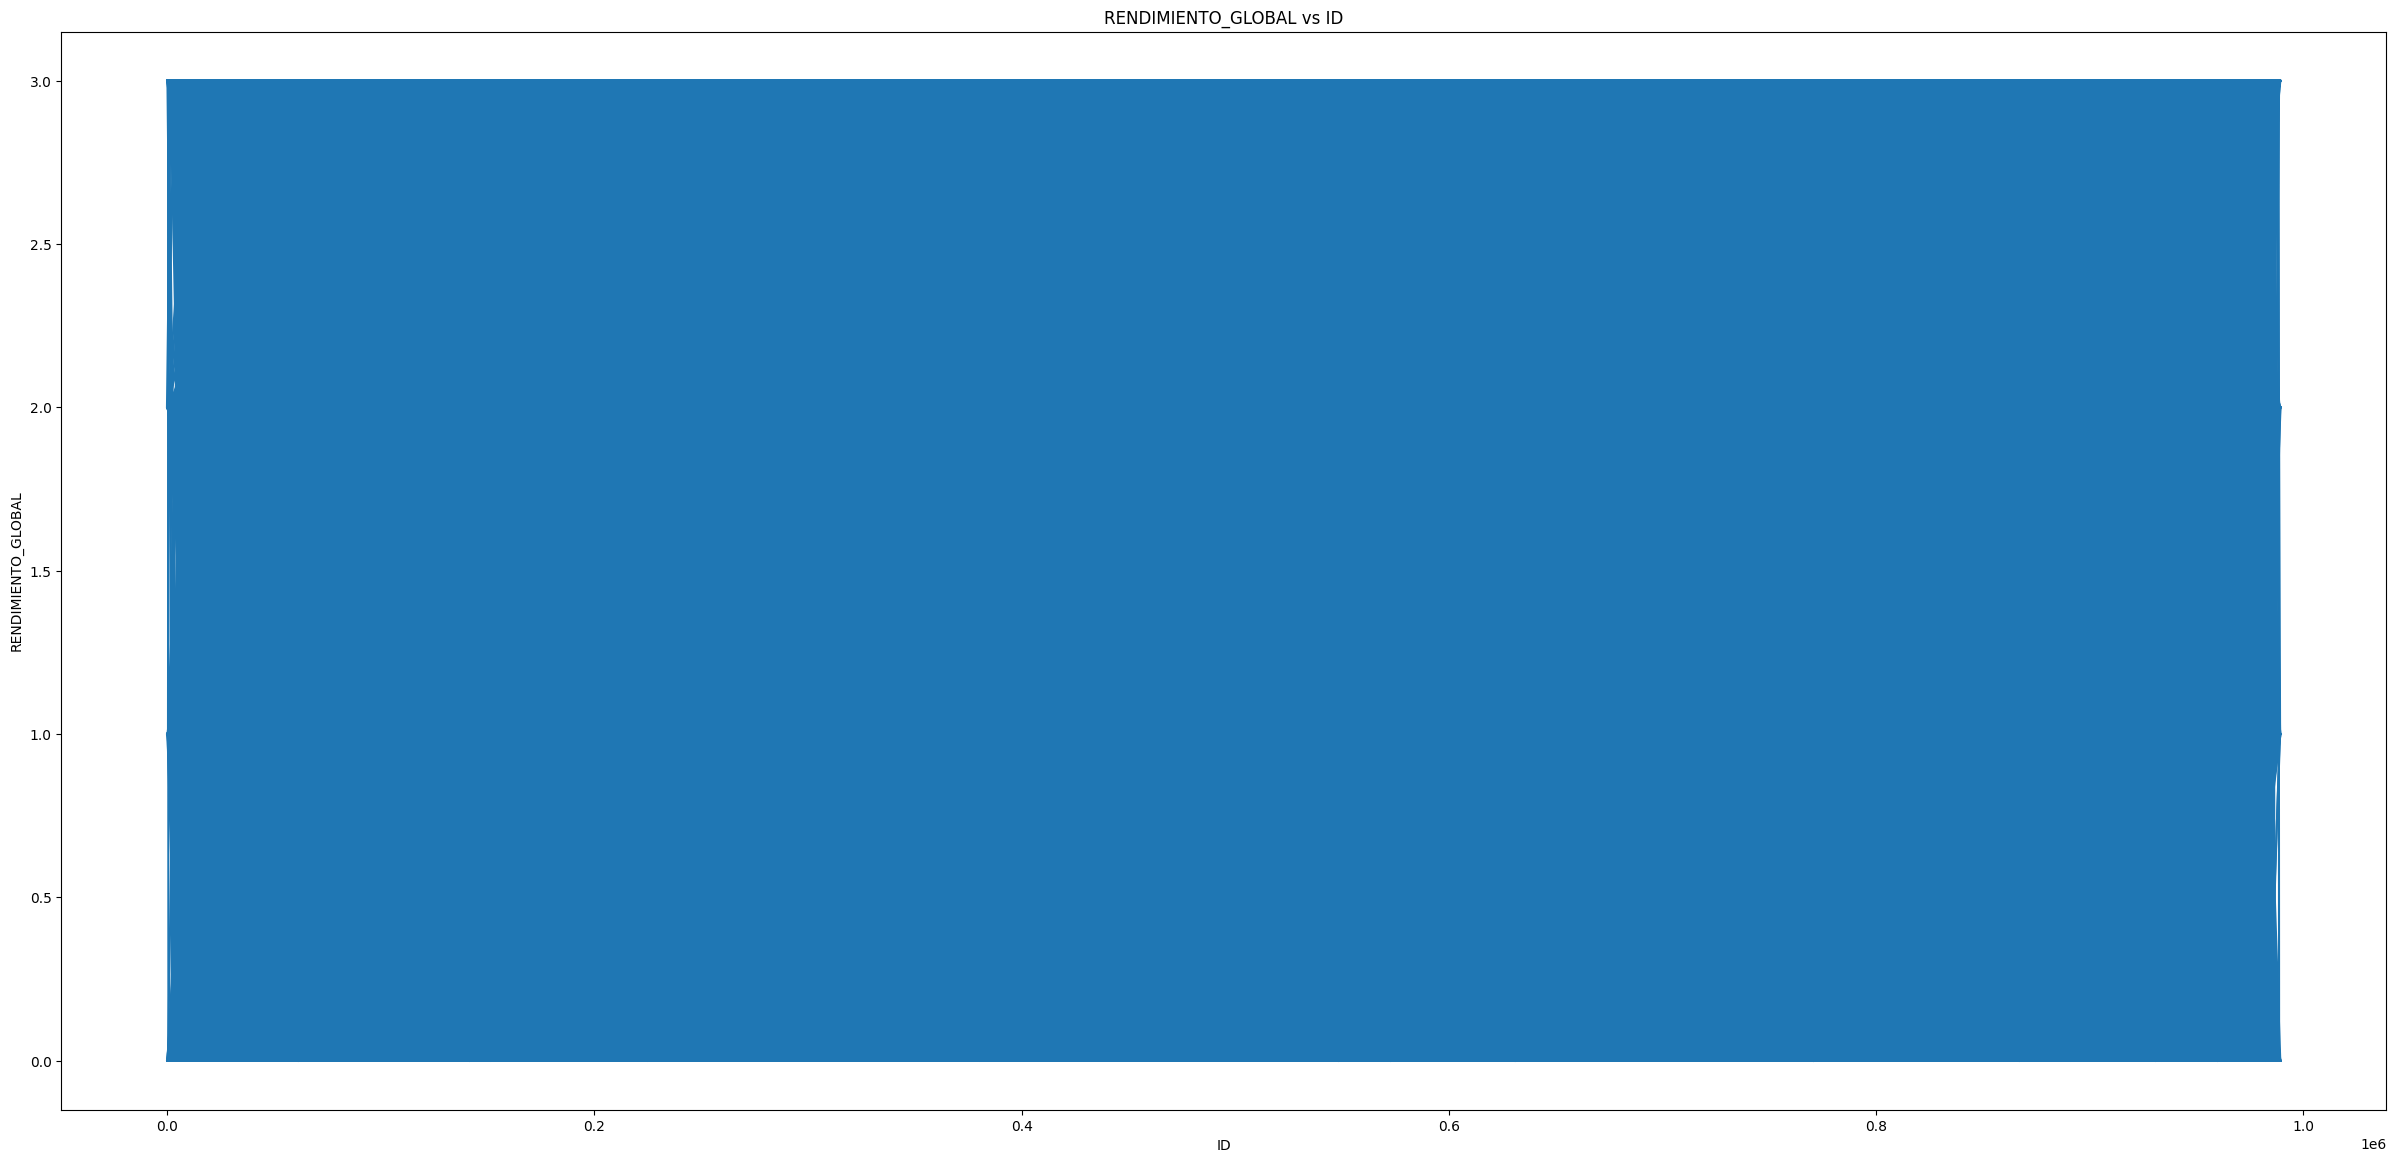

In [75]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(30,14))
plt.plot(train['ID'], train['RENDIMIENTO_GLOBAL'])
plt.title("RENDIMIENTO_GLOBAL vs ID")
plt.xlabel('ID')
plt.ylabel('RENDIMIENTO_GLOBAL')
plt.show()

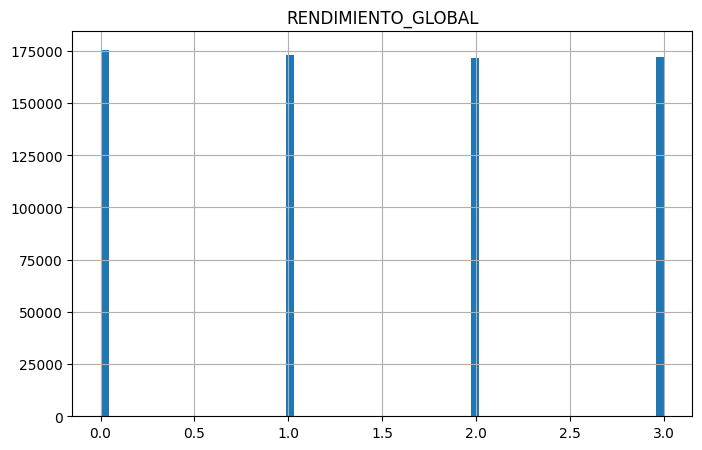

Skewness de la variable objetivo 0.010273368877325835


In [76]:
fig, ax1 = plt.subplots()
fig.set_size_inches(8, 5)
ax1.hist(train['RENDIMIENTO_GLOBAL'], bins=70)
ax1.set_title('RENDIMIENTO_GLOBAL')
ax1.grid(True)

plt.show()

print('Skewness de la variable objetivo', train['RENDIMIENTO_GLOBAL'].skew())

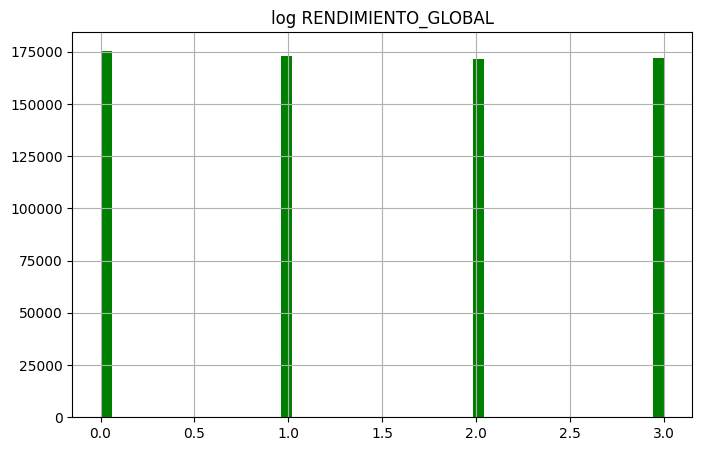

In [78]:
fig, ax2 = plt.subplots()
fig.set_size_inches(8, 5)
ax2.hist(train['RENDIMIENTO_GLOBAL'], bins=50, color='g')
ax2.set_title('log RENDIMIENTO_GLOBAL')
ax2.grid(True)
plt.show()